In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('DemandTimeDistribution_Smoothed.csv')
df.head()

,T,Smoothed_Pro
0,0,0.000004
1,1,0.000004
2,2,0.000004
3,3,0.000004
4,4,0.000004


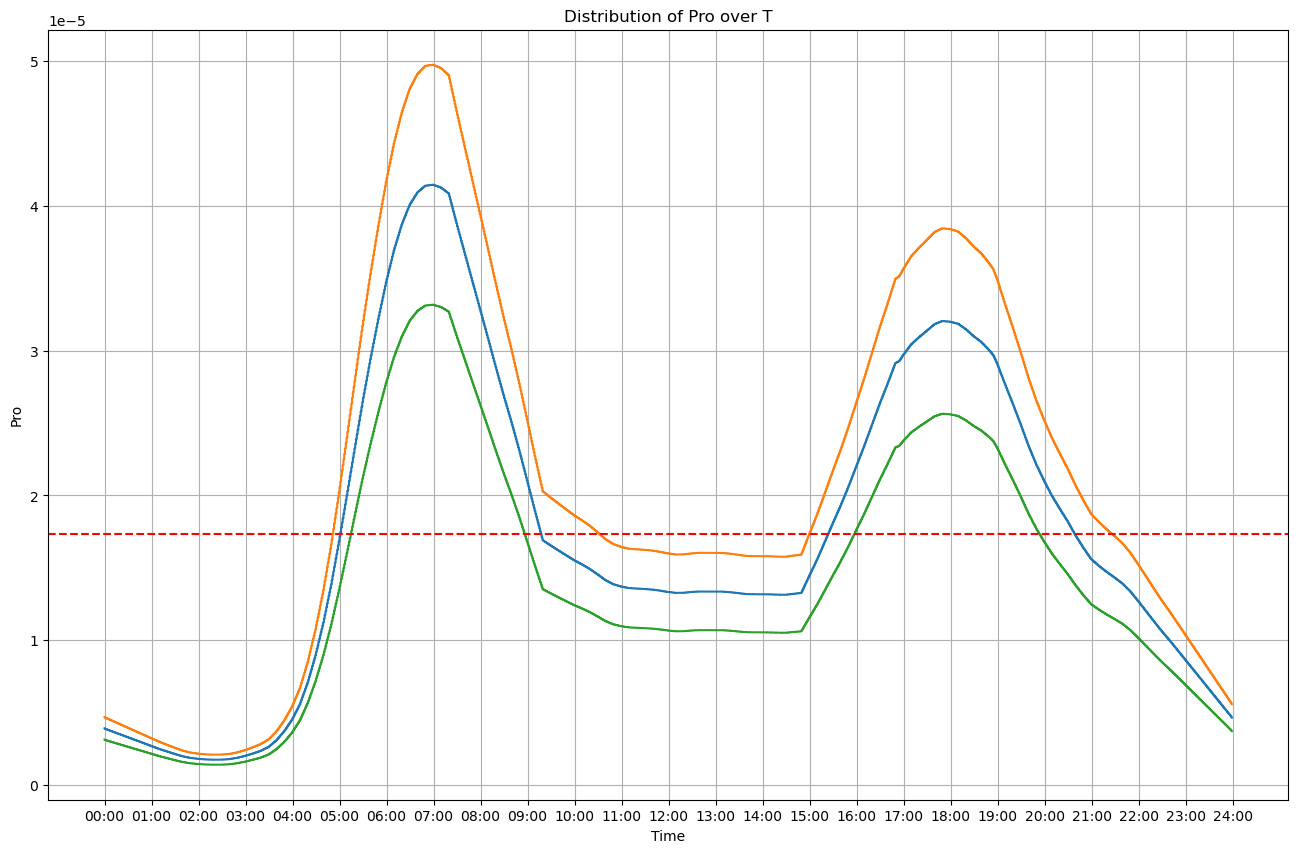

In [4]:
def convert_seconds_to_time(seconds):
    hours = (seconds // 2400) % 24
    minutes = (seconds % 2400) // 40
    return f"{hours:02}:{minutes:02}"

tranT = [convert_seconds_to_time(t) for t in df['T']]

df['MaxPro'] = df['Smoothed_Pro']* 1.2
df['MinPro'] = df['Smoothed_Pro']* 0.8

plt.figure(figsize=(16, 10))
plt.plot(tranT, df['Smoothed_Pro'])
plt.plot(tranT, df['MaxPro'])
plt.plot(tranT, df['MinPro'])
average_value = df['Smoothed_Pro'].mean()
plt.axhline(y=average_value, color='red', linestyle='--', label='Average Value')
plt.title('Distribution of Pro over T')
plt.xlabel('Time')
plt.ylabel('Pro')
plt.grid(True)

hours = [f"{h:02}:00" for h in range(25)]
plt.xticks(hours)

plt.show()